In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('proba.csv')
df

,Time_Segment,Holiday,Weekend Return,VVM10,Season,Exceeds Threshold
0,2-6,No,No,Medium,Winter,0
1,6-10,No,No,Medium,Winter,0
2,10-14,No,No,Medium,Winter,1
3,14-18,No,No,Medium,Winter,0
4,18-22,No,No,Medium,Winter,1
...,...,...,...,...,...,...
4375,6-10,Yes,No,Medium,Winter,0
4376,10-14,Yes,No,Medium,Winter,1
4377,14-18,Yes,No,Medium,Winter,1
4378,18-22,Yes,No,Medium,Winter,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday'] = df['Holiday'].map(mapeo)
    df['Weekend Return'] = df['Weekend Return'].map(mapeo)
    df = pd.get_dummies(df, columns=['Time_Segment', 'Season', 'VVM10'])
    df = df.astype(float)
    return df

def tree_grid_search(X_train, X_test, y_train, y_test):
    # Define the grid of hyperparameters to search
    param_grid = {
        'max_depth': [3, 4, 5, 6],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize the DecisionTreeClassifier model
    model = DecisionTreeClassifier()
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Extract the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    test_accuracy = best_model.score(X_test, y_test)
    print("Best Model Parameters:", grid_search.best_params_)
    print("Test Set Accuracy:", test_accuracy)

    # Optionally, plot feature importances (requires matplotlib)
    # lgb.plot_importance(best_model)
    # plt.show()

def main():
    # Read the dataset
    df = pd.read_csv('proba.csv')

    # Encode categorical variables and preprocess the data
    df = encoder(df)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    # Manually split the dataset (85% train, 15% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]


    # Perform grid search with decision tree classifier
    tree_grid_search(X_train, X_test, y_train, y_test)




In [4]:
#def encoder(df):
#    mapeo = {'Yes': 1, 'No': 0}
#    df['Holiday'] = df['Holiday'].map(mapeo)
#    df['Weekend Return'] = df['Weekend Return'].map(mapeo)
#    df = pd.get_dummies(df, columns=['Time_Segment', 'Season'])
#    df = df.astype(float)
#    return df

In [5]:
main()

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Model Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Set Accuracy: 0.802130898021309


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    
def tree_model():
    df = encoder(pd.read_csv('proba.csv'))
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']
    
    # Manually split the dataset (85% train, 15% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize the LightGBM model
    model = DecisionTreeClassifier(max_depth=4, min_samples_leaf= 1, min_samples_split= 2)

    # Initialize GridSearchCV
   
    # Fit GridSearchCV
    model.fit(X_train, y_train)

    y_pred= model.predict(X_test)

    # Evaluate the best model on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    # Calculate accuracy

    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    
    feature_importance = model.feature_importances_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=X.columns, color='skyblue')
    
def main():
    tree_model()

Accuracy: 0.802130898021309
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.68      0.77       326
         1.0       0.75      0.92      0.82       331

    accuracy                           0.80       657
   macro avg       0.82      0.80      0.80       657
weighted avg       0.82      0.80      0.80       657

Confusion Matrix:
[[223 103]
 [ 27 304]]


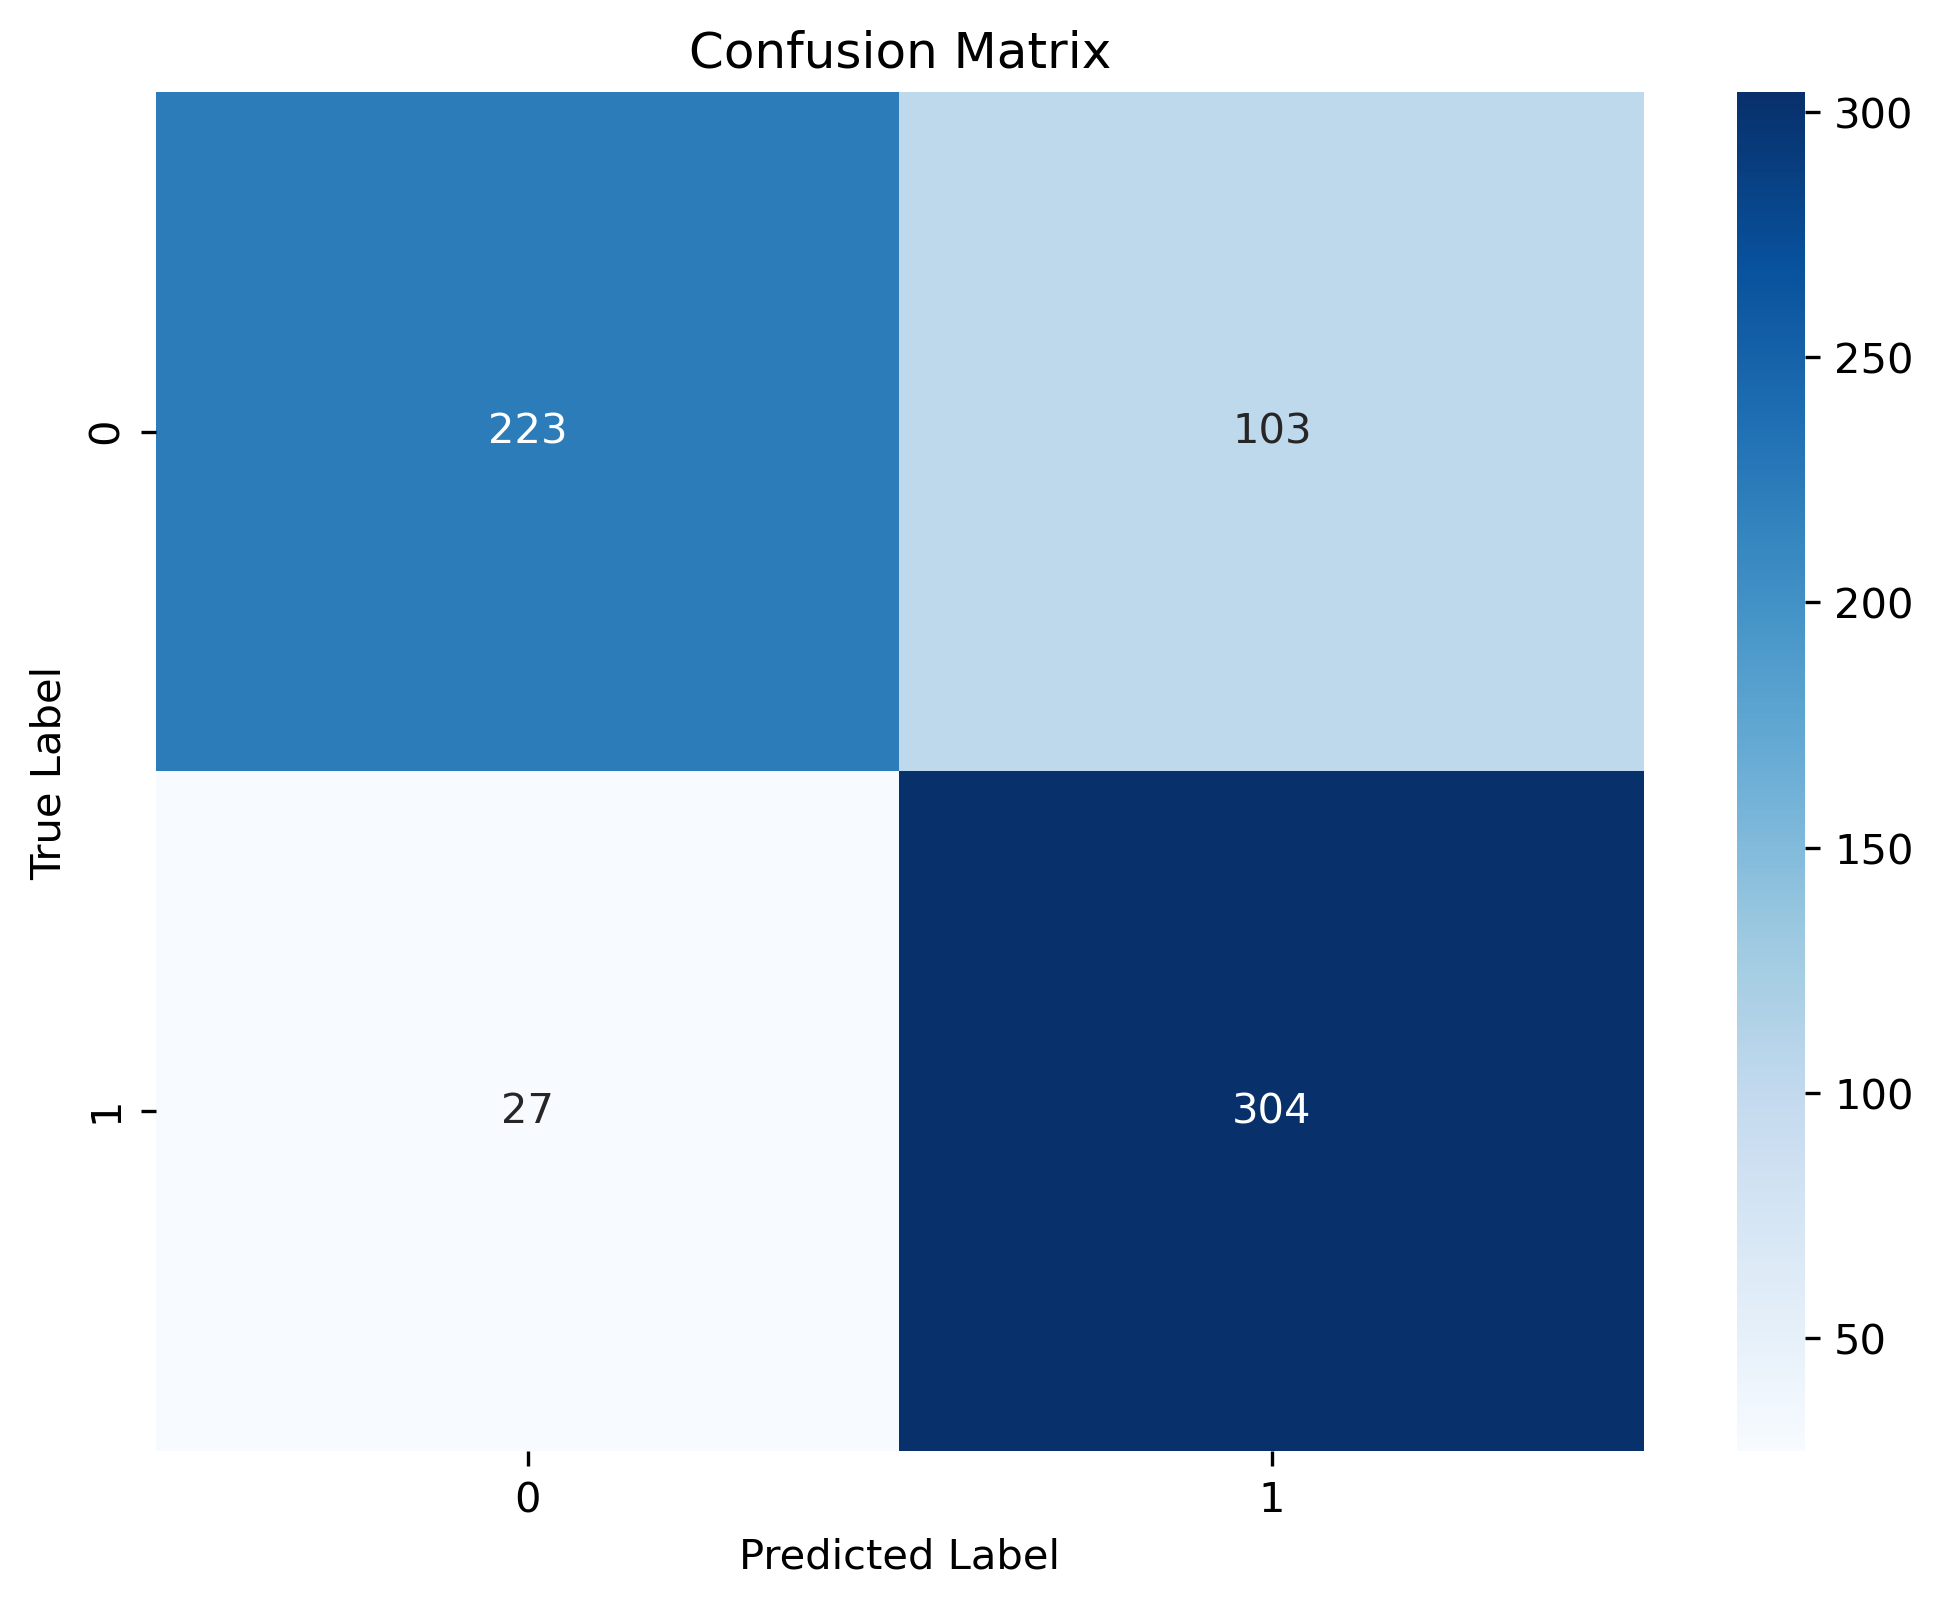

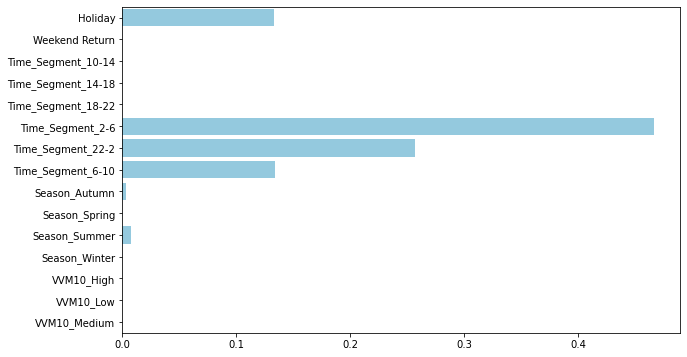

In [7]:
main()